Load in the two datasets, which are generated by the scripts `ben_sim_file_gen.py` and `jack_sim_file_gen.ipynb`

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq

# Define constants
jsave = 'jdata.npz'
bsave = 'bdata.npz'
# Load Jack results
jdat = np.load(jsave)
n_j = jdat['n']
ls_j = jdat['ls']
els_j = jdat['els']
erls_j = jdat['erls']
hls_j = jdat['hls']
hrls_j = jdat['hrls']
chi_j = jdat['chi']
# Load Ben results
bdat = np.load(bsave)
t_b = bdat['t']
chi_t_b = bdat['chi_t']
Sig_back_trc_b = bdat['Sig_back_trc']
Ref_back_trc_b = bdat['Ref_back_trc']
Sig_trc_b = bdat['Sig_trc']
Ref_trc_b = bdat['Ref_trc']
# Reshape Jack results
chi_j = np.reshape(chi_j, (100000,))
# Reshape Ben results
chi_t_b = np.reshape(chi_t_b, (100000,))
Sig_trc_b = np.reshape(Sig_trc_b, (100000,))
Sig_back_trc_b = np.reshape(Sig_back_trc_b, (100000,))
Ref_trc_b = np.reshape(Ref_trc_b, (100000,))
Ref_back_trc_b = np.reshape(Ref_back_trc_b, (100000,))

Compare $\chi$

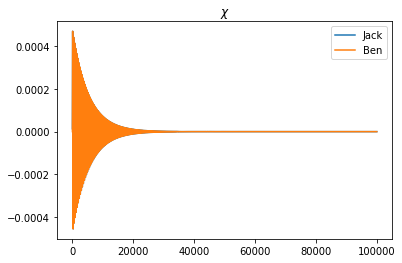

sum(abs(abs(chi_jack)-abs(chi_ben)))=0.030277


In [2]:
plt.plot(np.real(chi_j), label='Jack')
plt.plot(np.real(chi_t_b), label='Ben')
plt.title('$\chi$')
plt.legend()
plt.show()
print('sum(abs(abs(chi_jack)-abs(chi_ben)))=%f' % np.sum(np.abs(np.absolute(chi_j)-np.absolute(chi_t_b))))

Calculate incident, reflected, and transmitted E-fields from Jack's simulations

In [3]:
# Extract the reference E-field passing through i=ilen-6 as the incident field
inc_j = erls_j[:,1]
# Extract the E-field passing through i=ilen-6 as the transmitted field
trans_j = els_j[:,1]
# Extract the E-field passing through i=5 and the reference E-field passing through i=5 to calculate the reflected field
r_j = els_j[:,0] # Extract the transmitted E-field
rref_j = erls_j[:,0]
refl_j = r_j - rref_j

Calculate the incident, reflected, and transmitted E-fields from Ben's simulation

In [4]:
# Extract the reference E-field passing through the front
inc_b = Ref_trc_b
# Extract the E-field passing through the front
trans_b = Sig_trc_b
# Extract the E-field passing through the back and the reference E-field passing through the back to calculate the reflected field
r_b = Sig_back_trc_b # Extract the transmitted E-field
rref_b = Ref_back_trc_b
refl_b = r_b - rref_b

Compare the incident, reflected, and transmitted fields

/Users/jroth/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


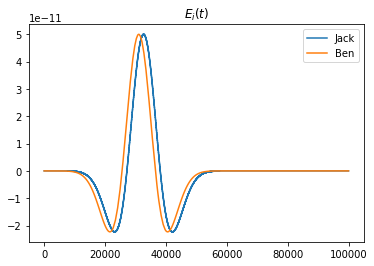

In [5]:
plt.plot(inc_j, label='Jack')
plt.plot(inc_b, label='Ben')
plt.title('$E_i(t)$')
plt.legend()
plt.show()

/Users/jroth/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


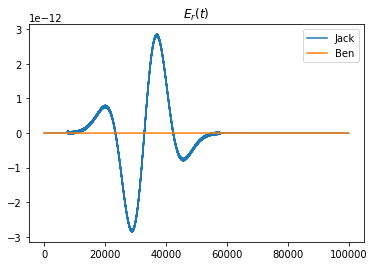

In [6]:
plt.plot(refl_j, label='Jack')
plt.plot(refl_b, label='Ben')
plt.title('$E_r(t)$')
plt.legend()
plt.show()

/Users/jroth/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


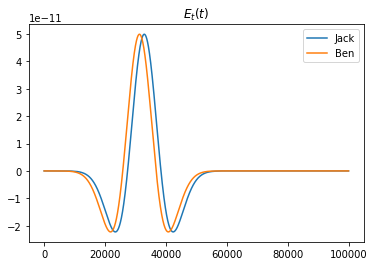

In [7]:
plt.plot(trans_j, label='Jack')
plt.plot(trans_b, label='Ben')
plt.title('$E_t(t)$')
plt.legend()
plt.show()

Calculate E-fields in frequency

In [8]:
# ################ #
# JACK CALCULATION #
# ################ #
# Determine the frequency axis
nf_j = fftfreq(len(n_j), np.diff(n_j)[0]) * 1e4 #  # Mulitply by 1e4 to go from units of 1e16 Hz -> 1e14 Hz which is THz
# Perform FFT on each field
incf_j = fft(np.real(inc_j))
transf_j = fft(np.real(trans_j))
reflf_j = fft(np.real(refl_j))
# Discard negative frequencies (at nlen/2 and above) and keep DC (at 0) for each field
nf_j = nf_j[0:int(len(n_j)/2)]
incf_j = incf_j[0:int(len(n_j)/2)]
transf_j = transf_j[0:int(len(n_j)/2)]
reflf_j = reflf_j[0:int(len(n_j)/2)]

In [9]:
# ############### #
# BEN CALCULATION #
# ############### #
# Determine the frequency axis
tf_b = fftfreq(len(t_b), np.diff(t_b)[0]) * 1e4 #  # Mulitply by 1e4 to go from units of 1e16 Hz -> 1e14 Hz which is THz
# Perform FFT on each field
incf_b = fft(np.real(inc_b))
transf_b = fft(np.real(trans_b))
reflf_b = fft(np.real(refl_b))
# Discard negative frequencies (at nlen/2 and above) and keep DC (at 0) for each field
tf_b = tf_b[0:int(len(t_b)/2)]
incf_b = incf_b[0:int(len(t_b)/2)]
transf_b = transf_b[0:int(len(t_b)/2)]
reflf_b = reflf_b[0:int(len(t_b)/2)]

Plot the E-fields in frequency

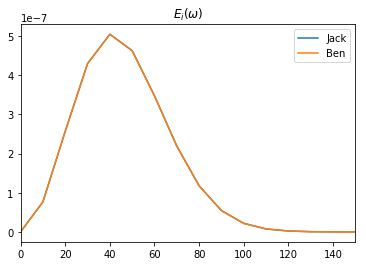

WARNING THE VALUES MIGHT BE TO SMALL
FOR THE SUM TO COMPUTE CORRECTLY
sum(abs(abs(incf_jack)-abs(incf_ben)))=0.000000


In [10]:
plt.plot(nf_j, np.absolute(incf_j), label='Jack')
plt.plot(tf_b, np.absolute(incf_b), label='Ben')
plt.xlim(0,150)
plt.title('$E_i(\omega)$')
plt.legend()
plt.show()
print('WARNING THE VALUES MIGHT BE TO SMALL\nFOR THE SUM TO COMPUTE CORRECTLY\nsum(abs(abs(incf_jack)-abs(incf_ben)))=%f' % np.sum(np.abs(np.absolute(incf_j)-np.absolute(incf_b))))

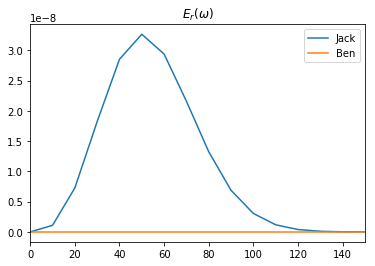

WARNING THE VALUES MIGHT BE TO SMALL
FOR THE SUM TO COMPUTE CORRECTLY
sum(abs(abs(reflf_jack)-abs(reflf_ben)))=0.000000


In [11]:
plt.plot(nf_j, np.absolute(reflf_j), label='Jack')
plt.plot(tf_b, np.absolute(reflf_b), label='Ben')
plt.xlim(0,150)
plt.title('$E_r(\omega)$')
plt.legend()
plt.show()
print('WARNING THE VALUES MIGHT BE TO SMALL\nFOR THE SUM TO COMPUTE CORRECTLY\nsum(abs(abs(reflf_jack)-abs(reflf_ben)))=%f' % np.sum(np.abs(np.absolute(reflf_j)-np.absolute(reflf_b))))

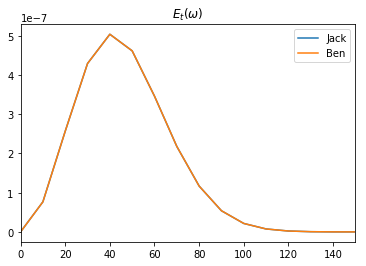

WARNING THE VALUES MIGHT BE TO SMALL
FOR THE SUM TO COMPUTE CORRECTLY
sum(abs(abs(transf_jack)-abs(transf_ben)))=0.000000


In [12]:
plt.plot(nf_j, np.absolute(transf_j), label='Jack')
plt.plot(tf_b, np.absolute(transf_b), label='Ben')
plt.xlim(0,150)
plt.title('$E_t(\omega)$')
plt.legend()
plt.show()
print('WARNING THE VALUES MIGHT BE TO SMALL\nFOR THE SUM TO COMPUTE CORRECTLY\nsum(abs(abs(transf_jack)-abs(transf_ben)))=%f' % np.sum(np.abs(np.absolute(transf_j)-np.absolute(transf_b))))